깃헙으로 Jupyter Notebook을 볼 경우 LaTex 문법이 깨지는 경우가 있어 되도록 nbviewer로 보는 것을 추천한다. $\rightarrow$ [nbviewer에서 보기](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap05%20-%20The%20Matrix/Chap05-The_Matrix.ipynb)

# Chap 05
# 행렬 - Matrix

## 5.1 행렬이란 무엇인가?

### 5.1.1 전통적인 행렬
일반적으로, $m$개의 행과 $n$개의 열을 가진 행렬은 $m \times n$행렬이라 한다. 행렬 $A$에 대해 $i,j$ *원소* 는 $i$번쨰 행과 $j$번째 열에 있는 원소로 정의되며, 전통적으로 $a_{i,j}$ 또는 $a_{ij}$로 나타낸다. <br />따라서, $F$상의 모든 $i=1,...,m$과 $j=1,...,n$에 대하여 $a_{ij} \in F$일 때,

$$A = \begin{bmatrix} a_{ 11 } & a_{ 12 } & \cdots  & a_{ 1n } \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \vdots & \vdots  \\ a_{m1} & a_{m2} & \cdots & a_{mn} \end{bmatrix}$$

을 $F$-위의 ($m \times n$)-행렬(($m \times n$)-matrix over $F$)이라고 한다.


### 5.1.2 행렬에 대해 알아보기

$F$상의 $D$-벡터를 집합 $D$에서 $F$로의 함수로 정의한거 처럼, $F$상의 $R \times C$ 행렬을 카테시안 곱 $R \times C$로의 함수로 정의한다. $R$의 원소를 *행 라벨* (row label) 이라 하고 $C$의 원소를 *열 라벨* (column label)이라 한다. <br />

**Example 5.1.3** 아래는 $R=$ `{'a', 'b'}`이고 $C=$`{'#', '@', '?'}`인 예이다. 

|      |  @   |  #   |  ?   |
| :--: | :--: | :--: | :--: |
|  a   |  1   |  2   |  3   |
|  b   |  10  |  20  |  30  |

### 5.1.3 행, 열, 엔트리

행렬의 유용한 점은 행과 열을 벡터로 해석할 수 있다. 위의 Example 5.1.3의 행렬을 아래와 같이 벡터로 나타낼 수 있다.

- 행 `a`는 벡터 [1, 2, 3] 이다.
- 행 `b`는 벡터 [10, 20, 30] 이다.
- 열 `@`는 벡터 [1, 10] 이다.
- 열 `#`은 벡터 [2, 20] 이다.
- 열 `?`는 벡터 [3, 30] 이다.

이번 5장에서는 행렬 구현 및 예제들을 파이썬의 고성능 수치 계산을 위한 모듈인 [NumPy](http://www.numpy.org/)를 사용한다. <br />numpy모듈을 이용하여 위의 Example 5.1.3을 다음과 같이 코드로 나타낼 수 있다.

In [1]:
import numpy as np

M = np.matrix('1 2 3; 10 20 30')  # = np.matrix([[1, 2, 3], [10, 20, 30]])
print(M)

[[ 1  2  3]
 [10 20 30]]


위와 같이 $R \times C$ 행렬 $M(r \in R, c \in C)$에 대해, $M$의 $r,c$원소는 $(r,c)$ 쌍이 매핑하는 것으로 정의 되며 $M_{r,c}$ 또는 $M[r,c]$로 나타내고, 행과 열은 아래와 같이 정의된다.

- $r \in R$에 대해, 행 $r$은 각 원소 $c \in C$에 대해 엔트리 $c$가 $M[r,c]$인 $C$-벡터 이다.
- $c \in C$에 대해, 열 $c$는 각 원소 $r \in R$에 대해 엔트리 $r$이 $M[r, c]$인 $R$-벡터 이다.

In [2]:
# 1. 행(row)
print('첫 번째 행 :', M[0,:])
print('두 번째 행 :', M[1,:])

# 2. 열(column)
print('첫 번째 열 :\n', M[:,0])
print('두 번째 열 :\n', M[:,1])
print('세 번째 열 :\n', M[:,2])

첫 번째 행 : [[1 2 3]]
두 번째 행 : [[10 20 30]]
첫 번째 열 :
 [[ 1]
 [10]]
두 번째 열 :
 [[ 2]
 [20]]
세 번째 열 :
 [[ 3]
 [30]]


### 5.1.4 행렬의 파이썬 구현

교재에서는 `Mat`이라는 클래스를 별도로 구현하지만, 여기서는 위에서도 언급 했듯이 numpy 모듈을 이용해서 행렬을 구현하도록 한다. 다음 행렬을 numpy 모듈을 이용해서 구현해보자. 

$$M=\begin{bmatrix} 2 & 1 & 3 \\ 20 & 10 & 30 \end{bmatrix}$$

In [3]:
import numpy as np

M = np.matrix('2 1 3; 20 10 30')
M

matrix([[ 2,  1,  3],
        [20, 10, 30]])

### 5.1.5 단위행렬 - Identity matrix 

***Definition*** 유한 집합 $D$에 대해 $D \times D$ 단위행렬은 행-라벨 집합과 열-라벨 집합이 둘다 $D$이고 모든 $d \in D$에 대해 엔트리 ($d, d$)는 $1$ (다른 모든 엔트리는 0)인 행렬이다. 단위행렬은 $\mathbb{1}_D$로 나타낸다. <br />

numpy에서는 `identity()`를 이용해 단위행렬을 생성할 수 있다.

In [4]:
# 2 x 2 단위행렬
i2 = np.identity(2)
# 3 x 3 단위행렬
i3 = np.identity(3)

print('2 x 2 단위행렬\n', i2)
print()
print('3 x 3 단위행렬\n', i3)

2 x 2 단위행렬
 [[ 1.  0.]
 [ 0.  1.]]

3 x 3 단위행렬
 [[ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]]


## 5.2 열공간(Column space)과 행공간(Row space)

행렬은 여러가지 목적을 위해 사용되며 그 중 한 가지는 벡터들의 묶음을 만드는 데 사용된다. 행렬을 벡터들의 묶음으로 해석하는 두 가지 방법이 있다. 바로, 열들의 묶음과 행들의 묶음이다. 따라서, 행렬과 연관된 벡터공간은 두 개가 있게 된다. <br />

***Definition*** : 행렬 $M$에 대해,

- $M$의 *열공간(Column space)* 은 Col $M$으로 나타내며 $M$의 열들에 의해 생성된 벡터공간이다.
- $M$의 *행공간(Row space)*은 Row $M$으로 나타내며 $M$의 행들에 의해 생성된 벡터공간이다.

***Example 5.2.2*** : $\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}$의 열공간은 $Span \{[1,10], [2,20], [3,30]\}$ 이다. 이 경우 $[2,20], [3,30]$은 $[1,10]$의 **스칼라배**이므로 열공간은 $Span\{[1,10]\}$과 동일하다. 행공간은 $Span\{[1, 2, 3]\}$이다.

## 5.3 벡터로서의 행렬

위의 5.3에서 처럼 행렬은 벡터로 해석될 수 있다. $F$상의 $R\times S$행렬은 $R \times S$에서 $F$로의 함수이다. 따라서 $F$상의 $R \times S$-벡터로 해석될 수 있다. 이 해석을 이용하면 벡터 연산인 *스칼라-벡터* 와 *벡터 덧셈* 을 행렬에 대해 사용할 수 있다.

In [5]:
M = np.matrix([[1,2,3], [10, 20, 30]])

# 스칼라-벡터 곱셈
print('스칼라-벡터 곱셈\n',M * 2)
# 벡터 덧셈
print('벡터 덧셈\n', M+M)

스칼라-벡터 곱셈
 [[ 2  4  6]
 [20 40 60]]
벡터 덧셈
 [[ 2  4  6]
 [20 40 60]]


## 5.4 전치(Transpose)

행렬의 *전치* 는 행과 열을 바꾸는 것을 의미한다. <br />

***Definition*** : $P \times Q$행렬의 전치는 $M^T$로 나타내며, 모든 $i \in P, j \in Q$에 대해 $(M^T)_{j,i}=M_{i,j}$를 만족하는 $Q \times P$ 행렬이다. <br />

다음 행렬 M에 대한 전치행렬은 아래와 같다.

$$M=\begin{bmatrix} 2 & 1 & 3 \\ 20 & 10 & 30 \end{bmatrix} \quad M^T=\begin{bmatrix} 1 & 10 \\ 2 & 20 \\ 3 & 30 \end{bmatrix}$$

In [6]:
M = np.matrix([[1,2,3], [10, 20, 30]])

print('numpy.matrix.transpose() \n', M.transpose())
print('numpy.matrix.T \n', M.T)

numpy.matrix.transpose() 
 [[ 1 10]
 [ 2 20]
 [ 3 30]]
numpy.matrix.T 
 [[ 1 10]
 [ 2 20]
 [ 3 30]]


만약 $M^T=M$이면, 행렬 $M$은 ***대칭행렬(Symmetric Matrix)***이라 한다. 

In [7]:
M = np.matrix([[1, 2], [2, 4]])

assert repr(M.T) == repr(M)

## 5.5 선형결합의 행렬-벡터 곱셈과 벡터-행렬 곱셈

***Definition(행렬-벡터 곱셈의 선형결합 정의)*** : $M$을 $F$상의 $R \times C$행렬이라고 하고, $v$는 $F$상의 $C$-벡터라고 하면, $M * v$는 선형결합이다. 

$$\sum _{ c\in C }^{  }{ v[c] } \quad (M의\_열\_c)$$

만약 행렬 $M$이 $R \times C$ 이지만 $v$는 $C$-벡터가 아니면, $M * v$는 성립하지 않는다.  즉, 행렬의 열(column) 수는 벡터의 원소 개수와 일치해야 한다. 아래의 예제를 보자. <br />

***Example 5.5.2*** :  <br />

$$\begin{matrix} \begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}*[7,0,4] & = & 7\begin{bmatrix} 1 \\ 10 \end{bmatrix}+0\begin{bmatrix} 2 \\ 20 \end{bmatrix}+4\begin{bmatrix} 3 \\ 30 \end{bmatrix} \\  & = & [7,70]+[0,0]+[12,120] \\  & = & [19,190] \end{matrix} $$

`numpy.dot`을 이용하여 벡터-행렬 곱셈을 구현할 수 있다.

In [8]:
M = np.matrix([[1,2,3], [10, 20, 30]])
v = [7, 0, 4]

print('M * v =', np.dot(M, v))

M * v = [[ 19 190]]


### 5.5.2 선형결합의 벡터-행렬 곱셈

***Definition(벡터-행렬 곱셈의 선형결합 정의)*** : $M$을 $R \times C$ 행렬이라 하고, $w$는 $R$-벡터라고 하면 $w * M$은 선형결합이다.

$$\sum _{ r\in R }^{  }{ w[r] } \quad (M의\_행\_r)$$

행렬과 벡터의 곱은 교환법칙이 성립되지 않는다. $M*v$는 성립하지만, $v *M$은 성립하지 않는 경우가 거의 대부분이다. <br />

***Example 5.5.7*** : <br />

$$\begin{matrix} [3,4]*\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix} & = & 3[1,2,3]+4[10,20,30] \\  & = & [3,6,9]+[40,80,120] \\  & = & [43,86,129] \end{matrix}$$

In [9]:
M = np.matrix([[1,2,3], [10, 20, 30]])
w = [3, 4]

print('w * M =', np.dot(w, M))

w * M = [[ 43  86 129]]


5.5.3 생략

### 5.5.4 행렬-벡터 방정식의 해 구하기 

- ***input***: $R \times C$ 행렬 $A$와 $R$-벡터 $b$
- ***output***: $A * \hat{x} = b$를 만족하는 $C$-벡터 $\hat{x}$

***Example 5.5.14*** : [Example 4.4.13](https://github.com/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap04%20-%20The%20Vector%20Space/Chap04-The_Vector_Space.ipynb) 에서 $Span\{[a,b],[c,d]\}$를 고려하였다. 이때, $a,b,c,d \in \mathbb{R}$이다.

- $[c,d]$가 $Span\{[a,b]\}$에 있지 않으면 $ad \neq bc$ 이다.
- 이 경우, $\mathbb{R}^2$의 모든 벡터 $[p,q]$에 대해 다음을 만족하는 계수 $\alpha , \beta$가 있다.

$$\begin{bmatrix} p \\ q \end{bmatrix}=\alpha \begin{bmatrix} a \\ b \end{bmatrix}+\beta \begin{bmatrix} c \\ d  \end{bmatrix}$$

$\alpha = \frac{dp-cq}{ad-bc}, \beta = \frac{aq-bp}{ad-bc}$ 라고 하면, 아래와 같이 쓸 수 있다. 

$$\begin{bmatrix} a & c \\ b & d \end{bmatrix} * \begin{bmatrix} \alpha  \\ \beta  \end{bmatrix} = \begin{bmatrix} p  \\ q  \end{bmatrix}$$

[`numpy.linalg.solve()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.solve.html) 를 이용해 행렬-벡터 방정식의 해를 구할 수 있다. 예를 들어 , 행렬방정식 $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}*\begin{bmatrix} \alpha \\ \beta \end{bmatrix}=\begin{bmatrix} -1 \\ 1 \end{bmatrix}$ 에서 $\begin{bmatrix} \alpha \\ \beta \end{bmatrix}$ 를 구한다고 할때, 아래와 같이 구할 수 있다.

In [10]:
A = np.matrix([[1, 2], [3, 4]])
b = np.array([-1, 1])

x = np.linalg.solve(A, b)
print(x)

[ 3. -2.]


## 5.6 도트곱(dot-product)의 행렬-벡터 곱셈

### 5.6.1 정의

***Definition(행렬 -벡터 곱셈의 도트곱 정의)*** : $M$이 $R \times C$ 행렬이고 $u$는  $C$-벡터 이면, $M * u$는 $R$-벡터 $v$이다. 이때, $v[r]$은 $M$의 행 $r$과 $u$의 도트곱이다. <br />

***Definition(벡터-행렬 곱셈의 도트곱 정의)*** : $M$이 $R \times C$ 행렬이고 $u$는  $R$-벡터 이면, $u * M$은 $C$-벡터 $v$이다. 이때, $v[c]$은 $u$와 $M$의 열 $c$ 의 도트곱이다. <br />

***Example 5.6.2*** : 행렬-벡터 곱셈을 고려해 보자.

$$\begin{matrix} \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 10 & 0 \end{bmatrix}*[3,-1] & = & \begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 10 & 0 \end{bmatrix}*\begin{bmatrix} 3 \\ -1 \end{bmatrix} \\  & = & 3\begin{bmatrix} 1 \\ 3 \\ 10 \end{bmatrix}-\begin{bmatrix} 2 \\ 4 \\ 0 \end{bmatrix} \\  & = & \begin{bmatrix} 1 \\ 5 \\ 30 \end{bmatrix} \\  & = & [1,5,30] \end{matrix}$$

In [11]:
M = np.matrix([[1, 2], [3, 4], [10, 0]])
v = [3, -1]

dot_prod = np.dot(M, v)
print(dot_prod)
print('dot_prod shape: {}'.format(dot_prod.shape))

[[ 1  5 30]]
dot_prod shape: (1, 3)


### 5.6.2 응용 예

***Example 5.6.4*** : 고해상도 이미지가 있다고 해 보자. 이 이미지의 해상도를 줄여 *다운샘플링(downsampling)*을 한다고 해보자. <br />

아래의 그림처럼 원래의 이미지를 ($4 \times 4$) 크기 만큼 그룹을 지어 그 그룹의 평균을 저해상도의 이미지 픽셀값으로 설정한다.

![](./images/example01.PNG)

아래의 코드는 파이썬에서 `pillow`라는 모듈을 이용하여 이미지 파일을 불러오고 `Image.resize()`메소드를 이용해 사이즈를 4배 축소해준 예제 및 `for`문을 순회 하면서 위의 설명 처럼 ($4 \times 4$) 크기 만큼 그룹을 만들어 그 값의 평균을 픽셀값으로 지정하여 `img_r`이라는 이미지 행렬을 만들어 준 예제이다.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [13]:
# 이미지 파일 불러오기
img = Image.open('./images/original.png') 
img = img.convert('L')
img_org = img
print('img.size : {}'.format(img.size))  # (width, height)

# 이미지를 너비, 높이를 4배 씩 축소하기
img_resized = img.resize((int(img.size[0]/4), int(img.size[1]/4)))
print('resized img size : {}'.format(img_resized.size))

# 이미지 파일을 np.asarray를 이용해 배열로 만들기
img_org = np.asarray(img_org, dtype='float32')
img_resized = np.asarray(img_resized, dtype='float32')

img.size : (460, 259)
resized img size : (115, 64)


In [14]:
img2 = []
for i in range(int(img_org.shape[0]/4)):  # 행(row)
    for j in range(int(img_org.shape[1]/4)):  # 열 (column)
        tmp = []
        for m in range(4):  # 4 x 4 행렬의 행 
            for n in range(4):  # 4 x 4 행렬의 열
                tmp.append(img_org[4*i+m, 4*j+n])
        img2.append(np.mean(tmp))

img_r = np.asarray(img2).reshape(64, -1)

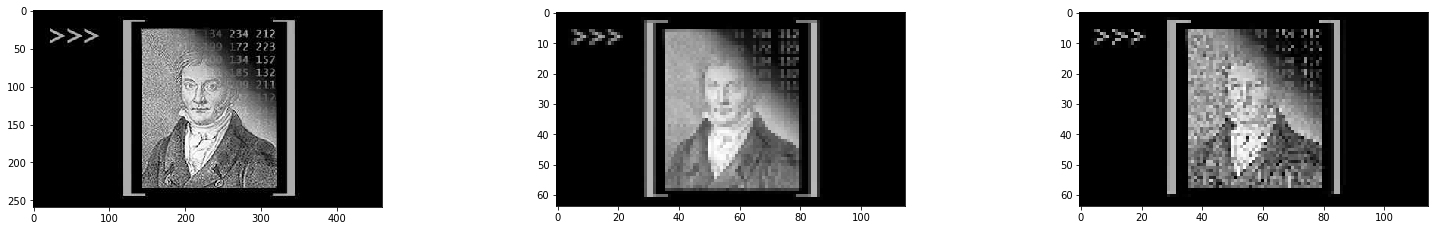

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
fig.subplots_adjust(hspace = .5, wspace=.5)

img_list = [img_org, img_r, img_resized]
title_list = ['original', 'downsample', 'resizing']

for i, img in enumerate(img_list):
    axs[i].imshow(img ,cmap='Greys_r')

### 5.6.3 선형방정식들의 시스템을 행렬-벡터 방정식으로 구성하기

[3.9.2 선형방정식](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/8924c9d0bff0b3dff953ce65b4f690489e0ccfab/LinearAlgebra/CodingTheMatrix/Chap03%20-%20The%20Vector/Chap03-The_Vector.ipynb#3.9.2-선형방정식)에서 선형방정식은 $\alpha \cdot x = \beta$ 형태의 방정식으로 정의하였고 선형방정식들의 시스템(일차 연립방정식)을 이러한 방정식들의 컬렉션으로 정의했다. 

$$\begin{matrix} a_1 \cdot x & = & \beta_1 \\ a_2 \cdot x & = & \beta_2 \\  & \vdots &  \\ a_m \cdot x& = & \beta_m \end{matrix} \quad \Longleftrightarrow \quad A \cdot x = b$$

이를 행렬-벡터 곱셈의 도트곱 정의를 사용하여 행렬-벡터 방정식으로 나타낼 수 있다. $A$를 행들이 $a_1,a_2,...,a_m$인 행렬이라 하고, $b$는 벡터 $[\beta_1, \beta_2,..., \beta_m]$라고 하면, 선형방정식들의 시스템은 행렬-벡터 방정식 $A \cdot x = b$와 동일하다. 따라서 선형시스템의 해를 구하는 것은 곧 *행렬방정식의 해* 를 구하는 것과 같은 의미다.

### 5.6.4 삼각시스템(Triangular system)과 삼각행렬(Triangular matrix)

[3.11](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/8924c9d0bff0b3dff953ce65b4f690489e0ccfab/LinearAlgebra/CodingTheMatrix/Chap03%20-%20The%20Vector/Chap03-The_Vector.ipynb#3.11-선형방정식들의-삼각시스템에-대한-해-구하기)에서 선형방정식들의 삼각시스템에 대한 해를 구하는 알고리즘을 알아보았다.  아래의 삼각시스템을 행렬-벡터 방정식으로 나타내면 다음과 같다.

$$\begin{matrix} 1x_{ 1 }+0.5x_{ 2 }-2x_{ 3 }+4x_{ 4 } & = & -8 \\ 3x_{ 2 }+3x_{ 3 }+2x_{ 4 } & = & 3 \\ 1x_{ 3 }+5x_{ 4 } & = & -4 \\ 2x_{ 4 } & = & 6 \end{matrix}\quad \Longleftrightarrow \quad \begin{bmatrix} 1 & 0.5 & -2 & 4 \\ 0 & 3 & 3 & 2 \\ 0 & 0 & 1 & 5 \\ 0 & 0 & 0 & 2 \end{bmatrix}\cdot \begin{bmatrix} x_{ 1 } \\ x_{ 2 } \\ x_{ 3 } \\ x_{ 4 } \end{bmatrix}=\begin{bmatrix} -8 \\ 3 \\ -4 \\ 6 \end{bmatrix}$$



***Definition*** : $n \times n$ *상삼각* (Upper-triangular) 행렬 $A$는 $i >j$에 대해 $A_{ij}=0$ 행렬이다.  <br />

삼각형을 형성하는 즉, Upper-traingular 부분의 원소들은 0일 수도 있고 아닐 수도 있다.  <br />

numpy에서는 `numpy.triu`를 이용해 Upper-triangular를 구할 수 있다.

In [16]:
m = np.matrix([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

ut = np.triu(m, -1)
print(ut)

[[ 1  2  3]
 [ 4  5  6]
 [ 0  8  9]
 [ 0  0 12]]


### 5.6.5 행렬-벡터 곱셈의 산술적 성질

행렬-벡터 곱셈의 도트곱 해석을 사용하여 두 개의 중요한 성질을 유도해 보자.  <br />

***Proposition*** : $M$을 $R \times C$ 행렬이라 하면, <br />

- 임의의 $C$-벡터 $v$와 임의의 스칼라 $\alpha$에 대해, 

$$M \cdot (\alpha v)=\alpha (M \cdot v)$$

- 임의의 $C$-벡터 $u$와 $v$에 대해,

$$M \cdot (u + v) = M \cdot u + M \cdot v$$

![](./images/proof01.PNG)

## 5.7 영공간 - Null space

### 5.7.1 동차 선형시스템과 행렬방정식

[4.6](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap04%20-%20The%20Vector%20Space/Chap04-The_Vector_Space.ipynb#4.6-동차-혹은-비동차-선형시스템)에서 동차 선형시스템에 대해 알아보았다. 동차 선형 시스템은 우변의 값들이 모두 영(0)인 선형 방정식들의 시스템이다. 이러한 시스템은 우변이 영벡터인 행렬-벡터 방정식 $A \cdot x = 0$ 으로 나타낼 수 있다. <br />

***Definition*** : 행렬 $A$의 *영공간(Null space)* 은 집합 $\{v: A \cdot v = 0\}$이다. 이를 Null $A$로 나타낸다. Null $A$는 동차 선형시스템의 해집합이므로 벡터공간([4.4 참고](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap04%20-%20The%20Vector%20Space/Chap04-The_Vector_Space.ipynb#4.4-벡터공간))이다. <br />

***Example 5.7.2*** : $A = \begin{bmatrix} 1 & 4 & 7 \\ 2 & 5 & 8 \\ 3 & 6 & 9 \end{bmatrix}$ 이면, 첫 번째, 두번째 열의 합은 세 번째 열과 동일하므로 $A \cdot [1, 1, -1]$은 영벡터이다. 따라서, 벡터 [1, 1, -1]은 Null $A$에 속한다.  또한 임의의 스칼라 $\alpha$에 대해 $A \cdot (\alpha [1, 1, -1])$ 도 영벡터이다. 그러므로 $\alpha [1, 1, -1]$도 Null $A$에 속한다.  <br />

***Lemma*** : 임의의 $R \times C$ 행렬 $A$와 $C$-벡터 $v$에 대해 벡터 $z$가 $A$의 영공간(Null space)에 있을 필요충분조건은 $A \cdot (v + z)=A \cdot v$ 이다.

![](./images/proof02.PNG)

### 5.7.2 행렬-벡터 방정식의 해공간

***Corollary*** : $u_1$은 행렬-벡터 방정식 $A \cdot x = b$의 해라고 하면, $u_2$또한 해가 될 필요충분조건은 $u_1 - u_2$가 $A$의 영공간(Null space)에 속하는 것이다. 

![](./images/proof03.PNG)

<br />

***Corollary*** : 행렬-벡터 방정식 $A \cdot x = b$가 해를 가진다면, 이 해가 유일한 해가 될 필요충분조건은 $A$의 *영공간이 영벡터로만 구성* 되는 것이다.

## 5.8 스파스(Sparse) 행렬-벡터 곱 계산

Sparse Matrix(희소행렬)은 아래의 행렬과 같이 행렬의 원소(엔트리) 대부분이 $0$인 행렬을 의미한다.  

$$\begin{bmatrix} 11 & 22 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 \\ 33 & 0 & 55 & 0 & 0 \\ 0 & 0 & 0 & 66 & 0 \\ 0 & 0 & 0 & 0 & 77 \end{bmatrix}$$

***Definition(행렬-벡터 곱셈의 일반적 정의)*** : $M$이 $R \times C$ 행렬이고 $u$가 $C$-벡터이면, $M \times u$은 각 $r \in R$에 대해 다음을 만족하는 $R$-벡터 $v$이다.

$$v[r]=\sum _{ c \in C }^{  }{ M[r,c]u[c] } $$

위의 정의대로 행렬-벡터 곱셈을 구현한다고 하면 다음과 같이 작성할 수 있다.

1. for $i $ in $R$:
2. $v[i] : \sum _{ j \in C }^{  }{ M[i,j]u[j] }$

하지만, 희소행렬을 위의 방식대로 구현하면 효율적이지 않다. 희소행렬을 구현하는 방법 중 하나는 출력 벡터 $v$를 영벡터로 초기화하고, 그다음에 $M$의 영이 아닌 엔트리들에 대해 이터레이션하는 것이다.

1. initialize $v$ to zero vector
2. $v[i] : \sum _{ j \in C }^{  }{ M[i,j]u[j] }$

## 5.9 행렬과 함수의 만남

### 5.9.1 행렬에서 함수로
모든 행렬 $M$에 대해 행렬-벡터 곱셈을 사용하여 함수 $x \mapsto M \cdot x$ 를 정의할 수 있다. <br />

***Definition*** : 행렬 $M$이 필드 $F$상의 $R \times C$ 행렬이면 함수 $f_M : F^C \mapsto F^R$은 $f_M(x)=M \cdot x$ 로 정의 할 수 있다.  <br />

위의 Definition은 선형 대수학에서 사용되는 전통적인 정의는 아니며, 교재에서 별도로 정의한 것이다.  <br />

***Example 5.9.1*** : $M$은 아래의 행렬이라고 하자. 

|      |  #   |  @   |  ?   |
| :--: | :--: | :--: | :--: |
|  a   |  1   |  2   |  3   |
|  b   |  10  |  20  |  30  |

그러면, 함수 $f_M$의 정의역은 $\mathbb{R}^{\{\#, @, ?\}}$, 공역은 $\mathbb{R}^{\{a, b\}}$이다. 예를 들어, 벡터 $\begin{matrix} \# & @ & ? \\ [2, & 2, & -2] \end{matrix}$의 치역은 벡터 $\begin{matrix} a & b \\ [0, & 0] \end{matrix}$ 이다. 

### 5.9.2 함수에서 행렬로

어떤 행렬 $M$에 대응하는 함수 $f_M : F^A \mapsto F^B$ 가 있다고 하고, $f_M(x) = M \cdot x$인 행렬 $M$을 계산하고자 한다.  <br />

먼저, M에 대한 열-레이블(Column-label) 집합을 알아보면 $f_M$의 정의역은 $F^A$이므로, $x$는 $A$-벡터이다. 곱 $M \cdot x$가 성립하려면 $M$의 열-레이블 집합은 $A$가 되어야 한다. 그다음으로, $f_M$의 공역은 $F^B$이므로, $M$을 $x$에 곱한 결과는 $B$-벡터여야 한다. 이것이 성립하려면 $M$의 행-레이블(Row-label) 집합은 $B$가 되어야 한다.  <br />

$M$은 $B \times A$라는 것을 알았으므로, 이제 행렬 $M$의 원소들을 구하면 된다. 원소들을 구하기 위해 행렬-벡터 곱의 선형결합 정의를 이용한다. $F^A$에 대한 표준 생성자([4.2.5 참고](https://github.com/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap04%20-%20The%20Vector%20Space/Chap04-The_Vector_Space.ipynb))를 기억해 보자.  각 원소 $a \in A$에 대해 $a$는 1에 매핑하고 $A$의 다른 모든 원소는 0에 매핑하는 생성자 $e_a$가 있다. 선형결합 정의에 의하면 $M \cdot e_a$는 $M$의 열 $a$이다. 즉, $M$의 열 $a$는 $f_M(e_a)$와 동일해야 한다.

### 5.9.3 행렬을 유도하는 예

***Example 5.9.3*** : $s(\cdot)$ 은 $x$-좌표를 2만큼 스케일링하는 $\mathbb{R}^2 \mapsto \mathbb{R}^2$ 로의 함수라고 하고, 어떤 행렬 $M$에 대해 $s([x, y])=M \cdot [x,y]$라고 가정하자. 정의역 $[1,0]$에 대한 상(치역)은 $[2,0]$이고, $[0,1]$이 상은 $[0,1]$이다. 따라서 $M=\begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix}$ 이다. <br />
numpy와 matplotlib을 이용해 그래프로 확인 해보자. 

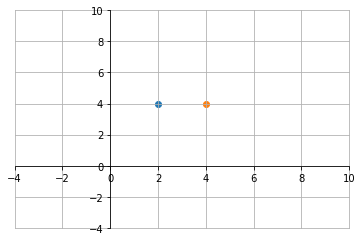

In [17]:
M = np.matrix([[2, 0], [0, 1]])  # 행렬 M 정의

v = [2, 4]  # 임의의 벡터 v

mv = np.dot(M, v)  # M * v

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.scatter([v[0]], [v[1]])
ax.scatter([mv[0, 0]], [mv[0, 1]])
ax.axis([-4, 10, -4, 10])
ax.grid()

plt.show()

***Example 5.9.4*** : $r_{90}(\cdot)$ 은 $\mathbb{R}^2 \mapsto \mathbb{R}^2$ 로의 함수라고 하자. 이 함수는 2D 상의 점들을 원점에 대해 반시계 방향으로 90도 회전하는 것이다. 어떤 행렬 $M$에 대해 $r_{90}([x,y]) = M \cdot [x,y]$라고 가정하자. $M$을 찾기 위해 두 표준 생성자 $[1,0]$과 $[0,1]$의 함수값을 구하면 $[1,0] \mapsto [0,1]$ 이고, $[0,1] \mapsto [-1,0]$이 된다. 행렬 $M$을 구하게 되면 $M=\begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$ 이다.

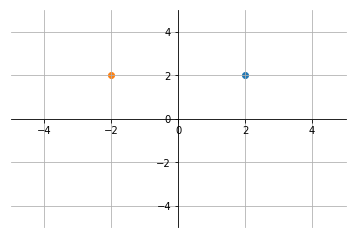

In [18]:
M = np.matrix([[0, -1], [1, 0]])  # 행렬 M 정의
v = [2, 2]  # 임의의 벡터 v
mv = np.dot(M, v)  # M * v

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.scatter([v[0]], [v[1]])
ax.scatter([mv[0, 0]], [mv[0, 1]])
ax.axis([-5, 5, -5, 5])
ax.grid()

plt.show()

***Example 5.9.5*** : 임의의 각도 $\theta$에 대해, $r_\theta(\cdot)$은 $\mathbb{R}^2 \mapsto \mathbb{R}^2$ 로의 함수라 하자. 이 함수는 원점에 대해 $\theta$만큼 반시계 방향으로 점들을 회전하는 것이다. 행렬 $M$에 대해 $r_\theta([x,y])=M \cdot [x,y]$라고 가정하자. 점 $[1, 0]$을 $\theta$ 만큼 회전하면 점 $[\cos\theta, \sin\theta]$가 얻어진다. 그리고 점 $[0,1]$을 $\theta$만큼 회전하면 점 $[-\sin\theta, \cos\theta]$ 가 얻어진다. 그 이유는 아래의 그림과 같다.

![](./images/example02.jpeg)

따라서,  $M=\begin{bmatrix}\cos\theta & -\sin\theta \\ \sin\theta & \cos\theta \end{bmatrix}$ 이다.

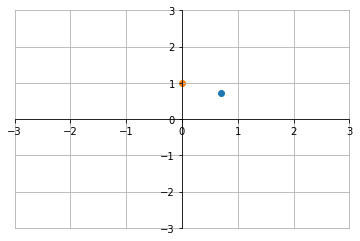

In [19]:
theta = np.pi / 4
M = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
v = [np.cos(theta), np.sin(theta)]
mv = np.dot(M, v)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.scatter([v[0]], [v[1]])
ax.scatter([mv[0, 0]], [mv[0, 1]])
ax.axis([-3, 3, -3, 3])
ax.grid()

plt.show()

## 5.10 선형함수 - Linear functions

### 5.10.1 행렬-벡터 곱으로 표현될 수 있는 함수

[4.4 벡터공간](https://render.githubusercontent.com/view/ipynb?commit=16c61755b7f755a32d5e337abd6fd37fd48da551&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f457863656c73696f72434a482f53747564792f313663363137353562376637353561333264356533333761626436666433376664343864613535312f4c696e656172416c67656272612f436f64696e675468654d61747269782f4368617030342532302d253230546865253230566563746f7225323053706163652f4368617030342d5468655f566563746f725f53706163652e6970796e62&nwo=ExcelsiorCJH%2FStudy&path=LinearAlgebra%2FCodingTheMatrix%2FChap04+-+The+Vector+Space%2FChap04-The_Vector_Space.ipynb&repository_id=116745719&repository_type=Repository#4.4-%EB%B2%A1%ED%84%B0%EA%B3%B5%EA%B0%84) 에서 벡테공간에 대한 세 가지 성질에 대해 살펴보았다. 또한 [5.6.5](https://render.githubusercontent.com/view/ipynb?commit=16c61755b7f755a32d5e337abd6fd37fd48da551&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f457863656c73696f72434a482f53747564792f313663363137353562376637353561333264356533333761626436666433376664343864613535312f4c696e656172416c67656272612f436f64696e675468654d61747269782f4368617030352532302d2532305468652532304d61747269782f4368617030352d5468655f4d61747269782e6970796e62&nwo=ExcelsiorCJH%2FStudy&path=LinearAlgebra%2FCodingTheMatrix%2FChap05+-+The+Matrix%2FChap05-The_Matrix.ipynb&repository_id=116745719&repository_type=Repository#5.6.5-%ED%96%89%EB%A0%AC-%EB%B2%A1%ED%84%B0-%EA%B3%B1%EC%85%88%EC%9D%98-%EC%82%B0%EC%88%A0%EC%A0%81-%EC%84%B1%EC%A7%88)에서 행렬-벡터 곱셈의 두 가지 대수적 성질을 알아보았다. 이제 이러한 대수적 성질을 사용하여 특수한 종류의 함수인 *선형함수* 를 정의해 보자.

### 5.10.2 정의와 간단한 예제 

***Definition*** : $\mathcal{U}$ 와 $\mathcal{V}$는 필드 $F$상의 벡터공간이라 하자. 함수 $f : \mathcal{U} \mapsto \mathcal{V}$은 다음 두 성질을 만족할 경우 ***선형함수(또는, 선형변환)*** 라고 한다.

- ***Property L1*** : $f$의 정의역 내 임의의 벡터 $u$와 $F$내 임의의 스칼라 $\alpha$에 대해, 

$$f(\alpha u) = \alpha f(u)$$

- ***Property L2*** : $f$의 정의역 내 임의의 두 벡터 $u$와 $v$에 대해,

$$f(u + v) = f(u) + f(v)$$

$M$은 필드 $F$상의 행렬 $R \times C$라 하고, 아래 함수를 $f(x) = M \cdot x$ 로 정의해 보자.

$$f : F^C \rightarrow F^R$$

정의역과 공역은 벡터공간이다. [5.6.5](http://nbviewer.jupyter.org/github/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap05%20-%20The%20Matrix/Chap05-The_Matrix.ipynb#5.6.5-행렬-벡터-곱셈의-산술적-성질)의 성질에 의하면 아래와 같이 함수 $f$는 Property L1과 L2를 만족한다.

$$f(\alpha u) = M \cdot \alpha u = \alpha (M \cdot u) = \alpha f(u)$$

$$f(u + v)= M \cdot (u + v) = M \cdot u + M \cdot v = f(u) + f(v)$$

따라서, $f$는 선형함수이다.  <br />

***Proposition*** : 임의의 행렬 $M$ 데 대해 함수 $x \mapsto M \cdot x$는 *선형함수* 이다. <br />

아래의 경우는 특수한 경우를 보여준다. <br />

***Lemma*** : $F$상의 임의의 $C$-벡터 $a$ 에 대해, $f(x) = a \cdot x$ 에 의해 정의된 함수 $f : F^C \rightarrow F$는 *선형함수* 이다.

- ***Proof*** : $A$는 $\{0\} \times C$행렬이라 하고, 이행렬의 유일한 행은 $a$라 하면, $f(x)= A \cdot x$이고 위의 Lemma 는 5.6.5의 성질에 의해 성립한다.

### 5.10.3 선형함수와 영벡터

***Lemma*** : $\mathcal{U}$ 와 $\mathcal{V}$는 필드 $F$상의 벡터공간이라 하고, $f: \mathcal{U} \rightarrow \mathcal{V}$ 가 선형함수이면, $f$는 $\mathcal{U}$의 영벡터를 $\mathcal{V}$의 영벡터에 매핑한다.

- ***Proof*** :  $0$을 $\mathcal{U}$의 영벡터, $0v$ 를 $\mathcal{V}$의 영벡터라 하면,

$$f(0) = f(0+0) = f(0) + f(0)$$

- 양번에 $f(0)$을 빼면 다음과 같다.

$$0v = f(0)$$

<br />

***Definition*** : 행렬의 영공간(Null space)와 마찬가지로 선형함수의 $f$의 *커널(kernel)* 을 $\{v : f(v) = 0\}$라고 정의하고, $f$의 커널을 Ker $f$ 로 나타낸다. <br />

***Lemma*** : 선형함수의 커널은 벡터공간이다. 

### 5.10.4 선형함수와 직선의 관계는 무엇인가?

함수 $f : \mathcal{U} \rightarrow \mathcal{V}$ 는 선형함수라 가정하고, $u_1$과 $u_2$는 $\mathcal{U}$ 내 두 개의 벡터라 하자. 선형결합 $\alpha_1 u_1 + \alpha_2 u_2$ 와 $f$의 상(함수값)을 고려해 보자. 함수 $f$ 를 선형함수라고 가정하였으니, 위의 Property L1과 L2 를 만족한다.

$$\begin{matrix} f(\alpha_1 u_1 + \alpha_2 u_2) & = & f(\alpha_1 u_1) + f(\alpha_2 u_2) \\  & = & \alpha_1 f(u_1) + \alpha_2 f(u_2) \end{matrix}$$

$u_1$ 과 $u_2$의 선형결합의 상(함수값)은 $f(u_1)$ 과 $f(u_2)$의 선형결합에 대응한다고 할 수 있다.  <br />

이것이 기하학적으로 무엇을 의미할까? 정의역 $\mathcal{U}$가 $\mathbb{R}^n$인 경우에 대해 고려해 보자. 점 $u_1$ 과 $u_2$ 를 지나는 직선은 $u_1$ 과 $u_2$ 의 *아핀 hull(Affine hull, [4.5.2 참고](https://github.com/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap04%20-%20The%20Vector%20Space/Chap04-The_Vector_Space.ipynb))*  즉, 아핀결합들로 구성된 집합니다. 

$$\{\alpha_1 u_1 +\alpha_2 u_2 : \alpha_1, \alpha_2 \in \mathbb{R} , \alpha_1 + \alpha_2 = 1\}$$

이러한 모든 아핀결합들에 대한 $f$의 상들의 집합은 아래와 같다.

$$\{ f(\alpha_1 u_1 + \alpha_2 u_2) : \alpha_1, \alpha_2 \in R, \alpha_1 + \alpha_2 = 1\}$$

또한, 위의 식은 다음과 같이 쓸 수 있다.

$$\{\alpha_1 f(u_1) + \alpha_2 f(u_2) : \alpha_2 u_2) : \alpha_1, \alpha_2 \in R, \alpha_1 + \alpha_2 = 1 \}$$

즉 .$f(u_1)$과 $f(u_2)$의 모든 아핀결합들의 집합이다. 따라서, 다음과 같이 나타낼 수 있다. <br />

$\Longrightarrow$ $u_1$ 과 $u_2$ 를 지나는 직선에 대한 $f$의 상은 $f(u_1)$과 $f(u_2)$를 지나는 ***"직선 "*** 이다.
<br />

***Proposition*** : 선형함수 $f$, $f$의 정의역 내 임의의 벡터 $v_1, \cdots , v_n$과 임의의 스칼라 $\alpha_1, \cdots , \alpha_n$에 대해, 다음이 성립한다.

$$f(\alpha_1 v_1 + \cdots + \alpha_n v_n) = \alpha_1 f(v_1) + \cdots + \alpha_n f(v_n)$$

즉, 임의의 *flat* 의 선형함수에 대한 상(함수값)은 또 다른 *flat* 이다. 

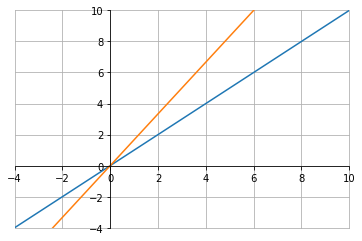

In [20]:
X = np.linspace(-4, 10, num=50, endpoint=True)
M = np.matrix([[2, 1], [2, 3]])

Y = X
mv = np.dot(M, np.column_stack((X, Y)).T)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.plot(X, Y)
ax.plot(mv.T[:,0], mv.T[:,1])
ax.axis([-4, 10, -4, 10])
ax.grid()

plt.show()

### 5.10.5 단사함수인 선형함수

커널(kernel)의 개념을 사용하여 선형함수가 단사함수인지 아닌지를 알아보는 기준을 제시할 수 있다. <br />

***Lemma (One-to-One Lemma)*** : 선형함수가 단사함수일 필요충분조건은 함수의 커널이 자명한 벡터공간이 되는 것이다.

- ***Proof*** : $f : \mathcal{V} \rightarrow \mathcal{W}$는 선형함수라고 하면 증명은 두 가지 방법으로 할 수 있다.
  - Ker $f$ 가 어떤 영이 아닌 벡터 $v$를 포함한다고 하자. 그리고 $f(v) = 0v$이며, 또한 $f(0)= 0v$ 일 경우 $f$는 단사함수가 아니다.
  - Ker $f=\{0\}$ 라고 하자. $v_1, v_2$는 $f(v_1) = f(v_2)$를 만족하는 임의의 벡터라고 하면 $f(v_1) - f(v_2) = 0v$ 이다. 선형성(linearity)에 의해 $f(v_1 - v_2) = 0v$이고, $v_1 - v_2 \in $ Ker $f$ 이다. Ker $f$는 $0$으로만 구성되므로 $v_1 - v_2 = 0$이고, 따라서 $v_1 = v_2$이다. 
- 위의 증명을 그림으로 나타내면 아래와 같다. *(출처 : [ratsgo's blog](https://ratsgo.github.io/linear%20algebra/2017/04/01/surinjection/))*

![](./images/one-to-one.png)

위의 Lemma 는 *선형시스템의 해가 유일한가?* 란 물음에 대해 새로운 관점을 제공한다. 선형시스템 $A \cdot x = b$의 해를 구하는 것은 함수 $f$ 에 대한 $b$의 원상(pre-image) 즉, $x$ 를 구하는 것으로 해석할 수 있다. 만약 원상이 존재하고, 그것이 $f$ 가 단사함 수일 경우 선형시스템의 해는 유일하다.

### 5.10.6 전사함수인 선형함수

정의역 $\mathcal{V}$ 를 가진 함수 $f$ 의 *상* 은 집합 $\{f(v) : v \in \mathcal{V}\}$ 라 하고, 함수 $f$ 가 ***전사함수(onto)*** 라는 것은 함수의 치역(Image)과 공역(codomain)이 일치해야 한다. <br />

$f : \mathcal{V} \rightarrow \mathcal{W}$ 가 선형함수일 때 $f$의 상을 Im $f$ 로 나타낸다. 따라서 $f$가 전사인지를 판단하는 것은 Im $f= \mathcal{W}$ 와 같다. 

아래의 그림은 전사함수가 아닌 경우와 전사함수인 경우를 나타낸다.  *(출처 : [ratsgo's blog](https://ratsgo.github.io/linear%20algebra/2017/04/01/surinjection/))*

![](./images/onto.png)

***Lemma*** : 선형함수의 상은 그 함수의 공역의 부분공간 이다. 

- ***Proof*** : $f : \mathcal{V} \rightarrow \mathcal{W}$ 는 선형함수라고 하면, Im $f$ 는 $\mathcal{W}$의 부분집합이다. Im $f$ 는 $\mathcal{W}$ 의 부분 공간임을 보이기 위해, Im $f$ 는 벡터공간의 성질  ([4.4 벡터공간](https://render.githubusercontent.com/view/ipynb?commit=16c61755b7f755a32d5e337abd6fd37fd48da551&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f457863656c73696f72434a482f53747564792f313663363137353562376637353561333264356533333761626436666433376664343864613535312f4c696e656172416c67656272612f436f64696e675468654d61747269782f4368617030342532302d253230546865253230566563746f7225323053706163652f4368617030342d5468655f566563746f725f53706163652e6970796e62&nwo=ExcelsiorCJH%2FStudy&path=LinearAlgebra%2FCodingTheMatrix%2FChap04+-+The+Vector+Space%2FChap04-The_Vector_Space.ipynb&repository_id=116745719&repository_type=Repository#4.4-%EB%B2%A1%ED%84%B0%EA%B3%B5%EA%B0%84) 참고) Property V1, V2, V3 을 만족해야 한다는 것을 보여야 한다. 

  - *V1* : [5.10.3](https://render.githubusercontent.com/view/ipynb?commit=b880b078c5a8359f7c14f856028c5f2c975ab775&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f457863656c73696f72434a482f53747564792f623838306230373863356138333539663763313466383536303238633566326339373561623737352f4c696e656172416c67656272612f436f64696e675468654d61747269782f4368617030352532302d2532305468652532304d61747269782f4368617030352d5468655f4d61747269782e6970796e62&nwo=ExcelsiorCJH%2FStudy&path=LinearAlgebra%2FCodingTheMatrix%2FChap05+-+The+Matrix%2FChap05-The_Matrix.ipynb&repository_id=116745719&repository_type=Repository#5.10.3-%EC%84%A0%ED%98%95%ED%95%A8%EC%88%98%EC%99%80-%EC%98%81%EB%B2%A1%ED%84%B0) 에서 보았듯이 $f$ 는 $\mathcal{V}$ 의 영벡터를 $\mathcal{W}$의 영벡터로 매핑한다. 따라서, $\mathcal{W}$ 의 영벡터는 Im $f$에 속한다. 
  - *V2* : $w$ 는 Im $f$ 내의 벡터라고 하면, Im $f$ 의 정의에 의하면, $f(v)= w$를 만족하는 벡터 $v$ 가 $\mathcal{V}$ 내에 있어야 한다. 임의의 스칼라 $\alpha$  에 대해, 다음이 성립한다. 따라서 $\alpha w$ 는 Im $f$ 내에 있다. 

  $$\alpha w = \alpha f(v) = f(\alpha v)$$

  - *V3* : $w_1$ 과 $w_2$ 는 Im $f$ 내에 있는 벡터라고 하면, Im $f$ 의 정의에 의해, $f(v_1) = w_1$ 과 $f(v_2) = w_2$ 를 만족하는 벡터 $v_1$ 과 $v_2$가 $\mathcal{V}$ 내에 있어야 한다. [5.10.2](https://render.githubusercontent.com/view/ipynb?commit=b880b078c5a8359f7c14f856028c5f2c975ab775&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f457863656c73696f72434a482f53747564792f623838306230373863356138333539663763313466383536303238633566326339373561623737352f4c696e656172416c67656272612f436f64696e675468654d61747269782f4368617030352532302d2532305468652532304d61747269782f4368617030352d5468655f4d61747269782e6970796e62&nwo=ExcelsiorCJH%2FStudy&path=LinearAlgebra%2FCodingTheMatrix%2FChap05+-+The+Matrix%2FChap05-The_Matrix.ipynb&repository_id=116745719&repository_type=Repository#5.10.2-%EC%A0%95%EC%9D%98%EC%99%80-%EA%B0%84%EB%8B%A8%ED%95%9C-%EC%98%88%EC%A0%9C) 에서 선형함수의 Property L1에 의하면 $w_1 + w_2 = f(v_1) + f(v_2) = f(v_1 + v_2)$ 이다. 따라서, $w_1 + w_2$ 는 Im $f$ 내에 있다. 

### 5.10.7 행렬에 의해 표현될 수 있는 $F^C$ 에서 $F^R$ 로의 선형함수

***Lemma*** : $f : F^C \rightarrow F^R$이 선형함수이면, 모든 벡터 $x \in F^C$ 에 대해 $f(x) = M \cdot x$ 을 만족하는 $F$ 상의 $R \times C$ 행렬 $M$ 이 있다. 

### 5.10.8 대각행렬 - Diagonal Matrix

$d_1 ,…, d_n$을 실수라고 하고, $f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ 은 $f([x_1, …, x_n]) = [d_1 x_1, …, d_n x_n]$ 을 만족하는 함수라고 하면, 이 함수에 대응하는 행렬은 다음과 같다. 

$$\begin{bmatrix} d_{ 1 } &  &  \\  & \ddots  &  \\  &  & d_n \end{bmatrix}$$

이러한 행렬을 *대각* 행렬이라 한다. <br />

***Definition*** : 정의역 $D$ 에 대해, $D \times D$ 행렬 $M$ 은 $ i \neq j$인 모든 쌍 $i, j \in D$ 에 대해 $M_{ij} = 0$이면 *대각행렬* 이다.  <br />

numpy 모듈에서 `numpy.diag()`를 이용해 대각행렬을 구현할 수 있다. 

In [21]:
x = np.arange(9).reshape(3, -1)
print(x)
x_diag = np.diag(x)
print('x_diag :', x_diag)

print('x의 대각행렬 : \n', np.diag(x_diag))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
x_diag : [0 4 8]
x의 대각행렬 : 
 [[0 0 0]
 [0 4 0]
 [0 0 8]]


## 5.11 행렬-행렬 곱셈

### 5.11.1 행렬-벡터 및 벡터-행렬 곱셈으로 표현한 행렬-행렬 곱셈 

***Definition :***

- 행렬-행렬 곱셈의 벡터-행렬 정의 : $A$의 각 행-라벨 $r$ 에 대해, 

$$AB의\_행\_r = (A의\_행\_r)\times B$$

- 행렬-행렬 곱셈의 행렬-벡터 정의 : $B$의 각 열-라벨 $s$에 대해, 

$$AB\_의\_열\_s = A \cdot (B의\_열\_s)$$

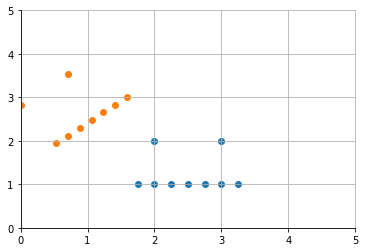

In [22]:
B = np.matrix([[2., 3., 1.75, 2., 2.25, 2.5, 2.75, 3., 3.25],
              [2., 2., 1., 1., 1., 1., 1., 1., 1.]])

theta = np.pi / 4
A = np.matrix([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

AB = np.dot(A, B)

fig, ax = plt.subplots()

for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')

# Hide the other spines...  
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')
    
ax.scatter(B.T[:,0].tolist(), B.T[:,1].tolist())
ax.scatter(AB.T[:,0].tolist(), AB.T[:,1].tolist())
ax.axis([0, 5, 0, 5])
ax.grid()

plt.show()

*5.11.2 생략*

### 5.11.3 행렬-행렬 곱셈과 함수 합성

행렬 $A$와 $B$는 행렬-벡터 곱셈 $f_A(y)=A \cdot y$ 와 $f_B(x)= B\cdot x$를 통해 함수를 정의 한다. 두 행렬을 곱한 결과인 행렬 $AB$ 를 $f_{AB}(x) = (AB)\cdot x$ 라고 하면, <br />

***Lemma*** :  $f_{AB} = f_A \circ f_B$

- ***proof*** : 행렬 $B$를 열 벡터로 나타내면 아래와 같다.

![](./images/proof04.PNG)

- 행렬-행렬 곱셈의 행렬-벡터 정의에 의해, $AB$의 열 $j$ 는 $A \cdot$ ($B$ 의 열 $j$) 이다. 임의의 $n$-벡터 $x=[x_1,…x_n]$ 에대해, 

$$\begin{matrix} f_B(x) & = & B \cdot x \\  & = & x_1b_1 + \cdots + x_nb_n \end{matrix}$$ 

$$\begin{matrix} \therefore  &  &  \\ f_A(f_B(x)) & = & f_A(x_1b_1+ \cdots +x_nb_n) \\  & = & x_1(f_A(b_1))+ \cdots + x_n(f_A(b_n)) \\  & = & x_1(Ab_1) + \cdots + x_n(Ab_n) \\  & = & x_1(AB\_의\_열\_1) + \cdots + x_n(AB\_의\_열\_n) \\  & = & (AB)\cdot x \\  &=  &f_{AB}(x)  \end{matrix}$$

***Definition*** : 행렬 $A$ 를 $k$ 번 곱한 것은 $A^k = AA\cdots A$ (k 번 곱함) 이다. 이를 "$A$ 의 $k$ 제곱 "이라 한다.

### 5.11.4 행렬-행렬 곱의 전치

***Proposition*** : 행렬 $A$와 $B$ 에 대해 다음이 성립한다. 

$$(AB)^T = B^T A^T$$

***Example 5.11.15***

$$\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}\begin{bmatrix} 5 & 0 \\ 1 & 2 \end{bmatrix}=\begin{bmatrix} 7 & 4 \\ 19 & 8 \end{bmatrix}$$

$${ \begin{bmatrix} 5 & 0 \\ 1 & 2 \end{bmatrix} }^{ T }{ \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} }^{ T }=\begin{bmatrix} 5 & 1 \\ 0 & 2 \end{bmatrix}\begin{bmatrix} 1 & 3 \\ 2 & 4 \end{bmatrix}=\begin{bmatrix} 7 & 19 \\ 4 & 8 \end{bmatrix}$$

In [23]:
A = np.matrix([[1, 2], [3, 4]])
B = np.matrix([[5, 0], [1, 2]])

print('(AB)^T : \n', np.dot(A, B).T)
print('B^T * A^T : \n', np.dot(B.T, A.T))

(AB)^T : 
 [[ 7 19]
 [ 4  8]]
B^T * A^T : 
 [[ 7 19]
 [ 4  8]]


### 5.11.5 열벡터와 행벡터

**열벡터** : $m \times 1$ 행렬은 행렬-벡터 곱셈에서 벡터 처럼 동작하므로 *열벡터* 라고 한다. 아래의 행렬-행렬곱을 고려해 보자.

$$\begin{bmatrix}  &  &  \\  & M &  \\  &  &  \end{bmatrix}\begin{bmatrix} u_{ 1 } \\ \vdots  \\ u_{ m } \end{bmatrix}=\begin{bmatrix} v_{ 1 } \\ \vdots  \\ v_{ n } \end{bmatrix}$$

위의 행렬-행렬 곱셈에서 ($n \times m$)-행렬 $M$에 열이 하나밖에 없는 행렬 $u$를 곱한 결과는 열이 하나인 행렬이 된다. 위의 식에서 $\begin{bmatrix} u_{ 1 } \\ \vdots  \\ u_{ m } \end{bmatrix}$를 벡터 $u$로 해석하고, $\begin{bmatrix} v_{ 1 } \\ \vdots  \\ v_{ m } \end{bmatrix}$를 벡터 $v$로 해석하면 위의 식은 행렬-벡터 식 $M \cdot u = v$로 해석할 수 있다. <br />

**행벡터** : 벡터를 행렬로 해석하는 또 다른 방법은 행이 하나 밖에 없는 행렬로 해석할 수 있다. 이러한 행렬을 *행벡터* 라고 한다. 이러한 행벡터의 오른쪽에 행렬 $M$을 곱하는 것은 벡터-행렬 곱셈과 같다.

$$\begin{bmatrix} u_{ 1 } & \cdots  & u_{ n } \end{bmatrix}\begin{bmatrix}  &  &  \\  & M &  \\  &  &  \end{bmatrix}=\begin{bmatrix} v_{ 1 } & \cdots  & v_{ m } \end{bmatrix}$$

### 5.11.6 모든 벡터는 열벡터로 해석된다. 

선형 대수학의 관례에 따르면, 행렬과 벡터가 관련된 것을 표현할 때 모든 벡터는 열벡터로 해석된다. 벡터를 행벡터 대신 열벡터로 해석하는 이유는 행렬-벡터 곱셈이 벡터-행렬 곱셈보다 더 흔하기 때문이다. 

***Example 5.11.17*** : 아래의 행렬-벡터 곱을 행렬-행렬(열벡터)로 나타낸다.

$$\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}\cdot \begin{bmatrix} 7, & 0, & 4 \end{bmatrix}\quad \Leftrightarrow \quad \begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}\begin{bmatrix} 7 \\ 0 \\ 4 \end{bmatrix}$$

***Example 5.11.18*** : 벡터-행렬 곱은 아래와 같이 나타낸다.

$$\begin{bmatrix} 3, & 4 \end{bmatrix}\cdot \begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}\quad \Leftrightarrow \quad { \begin{bmatrix} 3 \\ 4 \end{bmatrix} }^{ T }\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30 \end{bmatrix}$$

### 5.12 내적(Inner product)과 외적(Outer product)

### 5.12.1 내적 (Inner product)

$u$ 와 $v$ 는 두 개의 $D$-벡터라고 하고, "행렬-행렬" 곱 $u^T v$를 고려해 보자. 첫 번째 행렬은 하나의 행만 있고, 두 번째 행렬은 하나의 열만 가진다. 행렬-행렬 곱셈의 도트곱 정의 의하면 이 곱의 결과는 $u \cdot v$인 하나의 원소(엔트리)로 구성된다. 아래의 예제를 보자. <br />

***Example 5.12.1 :***

$$\begin{bmatrix} 1 & 2 & 3 \end{bmatrix}\begin{bmatrix} 3 \\ 2 \\ 1 \end{bmatrix}=\left[ 10 \right] $$

위와 같이 $u$와 $v$의 도트곱은 흔히 $u^T v$로 나타내고, *내적* 이라고 한다. (내적에 대한 자세한 내용은 Chap09.내적 에서 자세히 다룬다.) 파이썬에서 numpy 모듈의 `numpy.inner()`를 이용하여 벡터의 내적을 구할 수 있다. 위의 예제를 아래의 코드로 나타낼 수 있다. 

In [24]:
u = np.array([1, 2, 3])
v = np.array([3, 2, 1])

uv = np.inner(u, v)
print(uv)

10


### 5.12.2 외적 (Outer product)

이번에는 벡터 $u, v$ 에 대해 $uv^T$를 고려해 보자. $u$의 정의역 의 각 원소 $i$ 와 $v$ 의 정의역의 각 원소 $j$ 에 대해, $uv^T$ 의 $i, j$ 원소는 $u[i]v[j]$ 이다. 이러한 곱셉을 벡터 $u$와 $v$ 의 *외적* 이라고 한다.  <br />

***Example 5.12.2*** : 

$$\begin{bmatrix} u_{ 1 } \\ u_{ 2 } \\ u_{ 3 } \end{bmatrix}\begin{bmatrix} v_{ 1 } & v_{ 2 } & v_{ 3 } & v_{ 4 } \end{bmatrix}=\begin{bmatrix} u_1v_1 & u_1v_2 & u_1v_3 & u_1v_4 \\ u_2v_1 & u_2v_2 & u_2v_3 & u_2v_4 \\ u_3v_1 & u_3v_2 & u_3v_3 &u_3v_4  \end{bmatrix}$$

마찬가지로 `numpy.outer()`를 이용하여 벡터의 외적을 구할 수 있다.

In [25]:
u = np.array([1, 2, 3])
v = np.array([1, 2, 3, 4])

uv = np.outer(u, v)
print(uv)

[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]]


## 5.13 역함수와 역행렬

### 5.13.1 선형함수의 역함수는 선형함수이다.

***Lemma*** : $f$ 가 선형함수이고 $g$ 는 $f$ 의 역함수이면, $g$ 도 또한 선형함수이다.

- ***Proof*** : 다음 두 가지를 증명하면 된다.
  - $g$ 의 정의역 내 모든 벡터 쌍 $y_1, y_2$ 에 대해, $g(y_1 + y_2) = g(y_1) +g(y_2)$
  - $g$ 의 정의역 내 모든 스칼라 $\alpha$ 와 벡터 $y$ 에 대해, $g(\alpha y)=\alpha g(y)$

### 5.13.2 역행렬 

**Definition** : $A$ 는 $F$ 상의 $R \times C$ 행렬이라 하고 , $B$는 $F$상의 $C \times R$ 행렬이라 하자. 함수 $f : F^C \rightarrow F^R$ 은 $f_A(x)=Ax$ 라 정의 하고, 함수 $g : F^R \rightarrow F^C$는 $g(y)=By$라고 정의하자. $f$ 와 $g$가 서로의 역함수이면, 행렬 $A$와 $B$ 는 서로의 역행렬이라고 한다. $A$ 가 역행렬을 가지면 $A$는 가역행렬(Invertible matrix) 라고 한다. [역함수의 유일성](https://github.com/ExcelsiorCJH/Study/blob/master/LinearAlgebra/CodingTheMatrix/Chap01%20-%20The%20Function/Chap01-The_Function.ipynb)을 이용하여 행렬 또한 역행렬이 존재할 경우 오직 하나의 역행렬을 가진다는 것을 보여줄 수 있다. 가역행렬 $A$의 역행렬은 $A^{-1}$ 로 나타낸다. <br />

가역적이지 않은 행렬은 *특이행렬(singular matrix)* 이라한다. <br />

파이썬의 numpy 모듈에서 `numpy.linalg.inv()`를 이용하여 행렬의 역행렬을 구할 수 있다. 아래의 예제 Example 5.13.9 의 $A$의 역행렬을 구해보자.

In [26]:
A = np.matrix([[1, 0, 0, 0], [2, 1, 0, 0], [3, 0, 1, 0], [4, 0, 0, 1]])

A_inv = np.linalg.inv(A)
print(A_inv)

[[ 1.  0.  0.  0.]
 [-2.  1.  0.  0.]
 [-3.  0.  1.  0.]
 [-4. -0. -0.  1.]]


### 5.13.3 역행렬의 사용

***Lemma*** : $R \times C$ 행렬 $A$ 가 역행렬 $A^{-1}$ 을 가지면, $AA^{-1}$ 은 $R \times R$ 단위행렬(Identity Matrix) 이다.

- **Proof** : $B = A^{-1}$ 라고 하고, $f_A(x)=Ax, f_B(y)=By$라고 하면, $f_A \circ f_B$는 모든 $R$-벡터 $x$에 대해 $(f_A \circ f_B)(x) = ABx$를 만족한다. $f_A \circ f_B$ 는 항등함수이고, 따라서 $AB$ 는 $R \times R$ 단위행렬이다.

<br />

***Proposition*** : 행렬 $A$ 가 가역적이면, $A$의 행-라벨 집합과 동일한 정의역을 가지는 임의의 벡터 $B$에 대해 행렬-벡터 식 $Ax=b$ 는 정확하게 하나의 해를 가지며 그 해는 $A^{-1}b$ 이다. 

$$\begin{matrix} Ax & = & b \\ A^{-1}Ax & = & A^{-1}b \\ Ix & = & A^{-1}b \\ x & = & A^{-1}b \end{matrix}$$

<br />

***Lemma*** : $A$ 는 상삼각행렬(Upper triangular)이라고 하면, $A$ 가 가역적(invertible)이 될 필요충분조건은 $A$의 대각 원소가 모두 영(0)이 아니어야 한다.

### 5.13.4 가역행렬의 곱은 가역행렬이다. 

***Proposition*** : 만약 $A$ 와 $B$는 가역행렬이고 행렬 곱 $AB$는 가역행렬이고, $(AB)^{-1}=B^{-1}A^{-1}$ 이다.

-  **Proof** : 함수 $f$ 와 $g$ 를 $f(x) = Ax$ 와 $g(x)=Bx$ 라 하고, $A$ 와 $B$는 가역행렬이라고 하면 그에 대응하는 함수인 $f$ 와  $g$ 는 가역적이다. 그러므로 $f \circ$ g 는 가역적이고 그 가역 함수는 $g^{-1} \circ f^{-1}$ 이다. 따라서, $f \circ g$에 대응하는 행렬 $AB$ 는 가역행렬이고, 역행렬은 $B^{-1}A^{-1}$ 이다.

***Example 5.13.15*** : $A=\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}$ 와 $B=\begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}$ 는 함수 $f: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ 와 $g: \mathbb{R}^2 \rightarrow \mathbb{R}^2$ 에 대응한다. 

$$f\left( \begin{bmatrix} x_{ 1 } \\ x_{ 2 } \end{bmatrix} \right) =\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} x_{ 1 } \\ x_{ 2 } \end{bmatrix}=\begin{bmatrix} x_{ 1 }+x_{ 2 } \\ x_{ 2 } \end{bmatrix}$$

$$g\left( \begin{bmatrix} x_{ 1 } \\ x_{ 2 } \end{bmatrix} \right) =\begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} x_{ 1 } \\ x_{ 2 } \end{bmatrix}=\begin{bmatrix} x_{ 1 } \\ x_{1}+x_{ 2 } \end{bmatrix}$$

함수 $f$와 $g$ 는 가역적이므로, 함수 $f \circ g$ 가역적이다.  $f \circ g$ 의 행렬-곱셈은 다음과 같으며 $AB$도 가역행렬이다.

$$AB=\begin{bmatrix} 1 & 1 \\ 0 & 1 \end{bmatrix}\begin{bmatrix} 1 & 0 \\ 1 & 1 \end{bmatrix}=\begin{bmatrix} 2 & 1 \\ 1 & 1 \end{bmatrix}$$